# Position Model Analysis

In [1]:
import pandas as pd
import numpy as np
import cv2
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import pytesseract
import glob
import re
from IPython.display import display, clear_output
from tqdm import tqdm

In [2]:
def save_to_file(objeto, nome_arquivo):
    with open(nome_arquivo, 'wb') as output:
        pickle.dump(objeto, output, pickle.HIGHEST_PROTOCOL)


def load_file(nome_arquivo):
    with open(nome_arquivo, 'rb') as input:
        objeto = pickle.load(input)
    return objeto

In [20]:
list_of_files = glob.glob("../ANALYSE_DATA/*")

In [21]:
list_of_files

['../ANALYSE_DATA/fila_treino_138.0_10.pkl',
 '../ANALYSE_DATA/fila_treino_segundo_601_1_.pkl',
 '../ANALYSE_DATA/fila_treino_104.0_1.pkl',
 '../ANALYSE_DATA/fila_action_time_100.pkl',
 '../ANALYSE_DATA/fila_treino_138.0_15.pkl',
 '../ANALYSE_DATA/fila_treino_138.0_19.pkl',
 '../ANALYSE_DATA/fila_treino_138.0_17.pkl',
 '../ANALYSE_DATA/fila_primeiro_treino.pkl',
 '../ANALYSE_DATA/fila_treino_138.0_3.pkl',
 '../ANALYSE_DATA/fila_treino_138.0_8.pkl',
 '../ANALYSE_DATA/fila_treino_138.0_5.pkl',
 '../ANALYSE_DATA/fila_action_time_517.pkl',
 '../ANALYSE_DATA/fila_treino_segundo_601_6_.pkl',
 '../ANALYSE_DATA/fila_treino_138.0_13.pkl',
 '../ANALYSE_DATA/fila_treino_138.0_7.pkl',
 '../ANALYSE_DATA/fila_treino_138.0_6.pkl',
 '../ANALYSE_DATA/Debug.ipynb',
 '../ANALYSE_DATA/fila_treino_138.0_1.pkl',
 '../ANALYSE_DATA/fila_treino_segundo_601_2_.pkl',
 '../ANALYSE_DATA/fila_treino_138.0_12.pkl',
 '../ANALYSE_DATA/fila_treino_138.0_14.pkl',
 '../ANALYSE_DATA/fila_treino_segundo_601_5_.pkl',
 '../A

In [22]:
list_of_files = sorted(list_of_files)

In [46]:
list_of_files.reverse()

LOADING FILES AND WORKING WITH IT

8 px between each number

1 - Bom - 0 Ruim

In [24]:
vector_img = {}

In [25]:
countFiles = 0
countNumber = 0

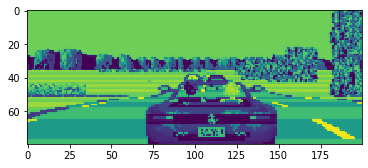

None

Digite para o valor 1:  


ValueError: invalid literal for int() with base 10: ''

In [52]:
for file in list_of_files:
    countFiles = countFiles + 1
    if 'fila_treino' in file:
        load = load_file(file)
        print('Tamanho Treino:',len(load))
        
        if 'fila_treino_segundo' in file:
            size = np.arange(len(load))
        else:
            size = np.random.randint(0,len(load),size=(50))
        
        for i in size : #np.random.randint(0,len(load),size=(200)):
            
            countNumber = i
            
            clear_output(wait=True)
            plt.imshow(load[i][0][140:,50:250])
            display(plt.show())

            img = load[i][0].copy()

            ihash_1 = hash(img[140:,50:250].tobytes())

            try:
                display(print('valor 1 salvo:',vector_img[ihash_1][1]))
            except:
                number = input('Digite para o valor 1: ')
                
                vector_img[ihash_1] = (img[140:,50:250].copy(),int(number)/10)

In [53]:
len(vector_img.keys())

1939

In [54]:
save_to_file(vector_img, 'train_images_outrun_position_Score.pkl')

In [55]:
def process_img(image, sigma=0.4):
	# compute the median of the single channel pixel intensities
    v = np.median(image)
    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)
    # return the edged image
    return edged

In [56]:
vec_process = {}
for key in vector_img.keys():
    imgProcessed = process_img(vector_img[key][0])
    vec_process[key] = (imgProcessed,vector_img[key][1])

In [59]:
vec_process[key][0].shape

(80, 200)

In [58]:
save_to_file(vec_process, 'train_images_outrun_position_Score_processed.pkl')